## رگرسیون نمایی

<div dir=rtl style="text-align: left">

هدف: پیش‌بینی تعداد دنبال‌کننده‌ها (Follows) بر اساس ویژگی‌های مختلف مانند بازدید از پروفایل (Profile Visits)، ایمپرشن (Impressions)، و اشتراک‌گذاری‌ها (Shares).
</div>

In [22]:
# =====================
# import libraries
# =====================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

دیتاست از سایت کگل دانلود شده: و در دایرکتوری فعلی قرار گرفته
<a href="https://www.kaggle.com/datasets/mirajdeepbhandari/polynomial-regression">لینک</a>

In [16]:
# =====================
# load dataset
# =====================

df = pd.read_csv("Ice_cream selling data.csv", encoding='latin1', low_memory=False)


In [17]:
# =====================
# print info
# =====================

print('first rows')
print(df.head())

print('shape')
print(df.shape)

print('columns')
df.dtypes

first rows
   Temperature (Â°C)  Ice Cream Sales (units)
0          -4.662263                41.842986
1          -4.316559                34.661120
2          -4.213985                39.383001
3          -3.949661                37.539845
4          -3.578554                32.284531
shape
(49, 2)
columns


Temperature (Â°C)          float64
Ice Cream Sales (units)    float64
dtype: object

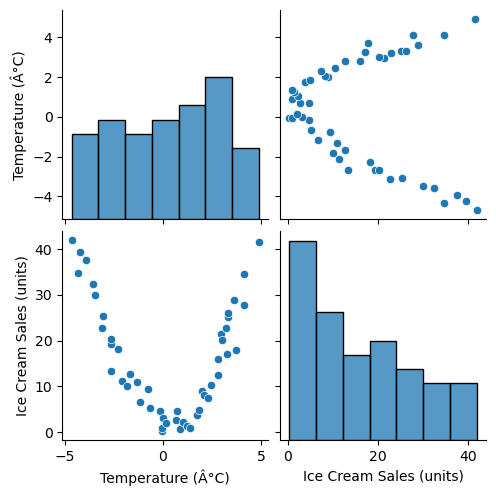

In [18]:
sns.pairplot(df)

In [20]:
# =====================
# preprocessing
# =====================

# Separate features and target variable
X = df[['Temperature (Â°C)']]
y = df['Ice Cream Sales (units)']

In [23]:
# =====================
# Train-Test Split
# =====================

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Training set size: 39 samples
Test set size: 10 samples


In [24]:
# =====================
# Train Polynomial Regression Model (Degree=2)
# =====================

# Initialize PolynomialFeatures with degree 2
poly = PolynomialFeatures(degree=2)

# Transform the features into polynomial features (degree 2)
X_poly = poly.fit_transform(X_train)

# Initialize Linear Regression model
model = LinearRegression()

# Train the model using the polynomial features
model.fit(X_poly, y_train)

# Print the coefficients (slope) and intercept
print(f"Intercept: {model.intercept_:.3f}")
print(f"Coefficients: {model.coef_}")


Intercept: 2.768
Coefficients: [ 0.         -0.70641926  1.87145125]


In [26]:
# =====================
# Model Evaluation
# =====================

# Transform the test data into polynomial features
X_test_poly = poly.transform(X_test)

# Make predictions on the test set
y_pred = model.predict(X_test_poly)

# Calculate Mean Squared Error (MSE) and RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Calculate R-squared (R²)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"R-squared (R²): {r2:.3f}")

Mean Squared Error (MSE): 14.879
Root Mean Squared Error (RMSE): 3.857
R-squared (R²): 0.843


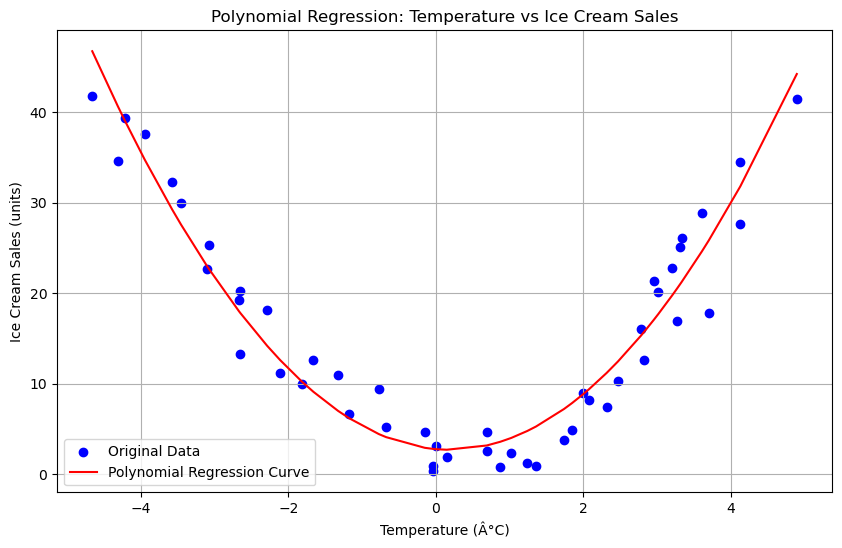

In [27]:

# Plot the original data points and the polynomial regression curve
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Original Data')
plt.plot(X, model.predict(poly.transform(X)), color='red', label='Polynomial Regression Curve')
plt.title('Polynomial Regression: Temperature vs Ice Cream Sales')
plt.xlabel('Temperature (Â°C)')
plt.ylabel('Ice Cream Sales (units)')
plt.legend()
plt.grid(True)
plt.show()